In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [ ]:
data=pd.read_csv('insurance_part2_data.csv')

In [ ]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
data.shape

(3000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [ ]:
data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [ ]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [ ]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [ ]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


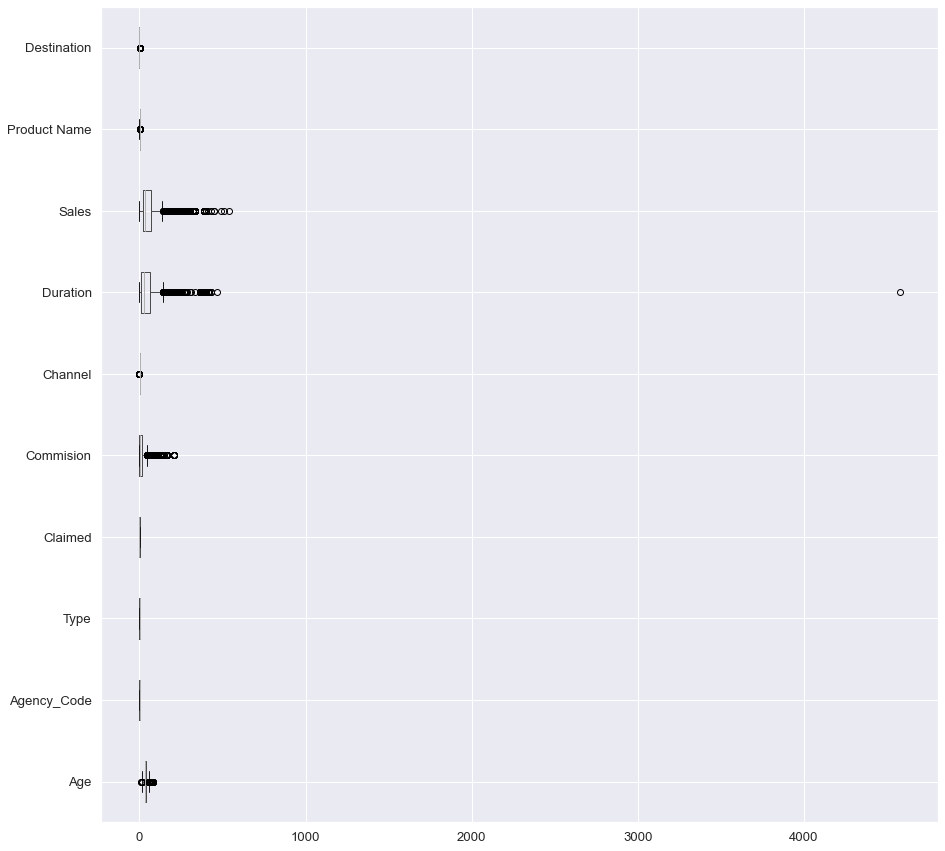

In [ ]:
plt.figure(figsize=(15,15))
data[['Age','Agency_Code', 'Type', 'Claimed', 'Commision','Channel','Duration','Sales','Product Name','Destination']].boxplot(vert=0)

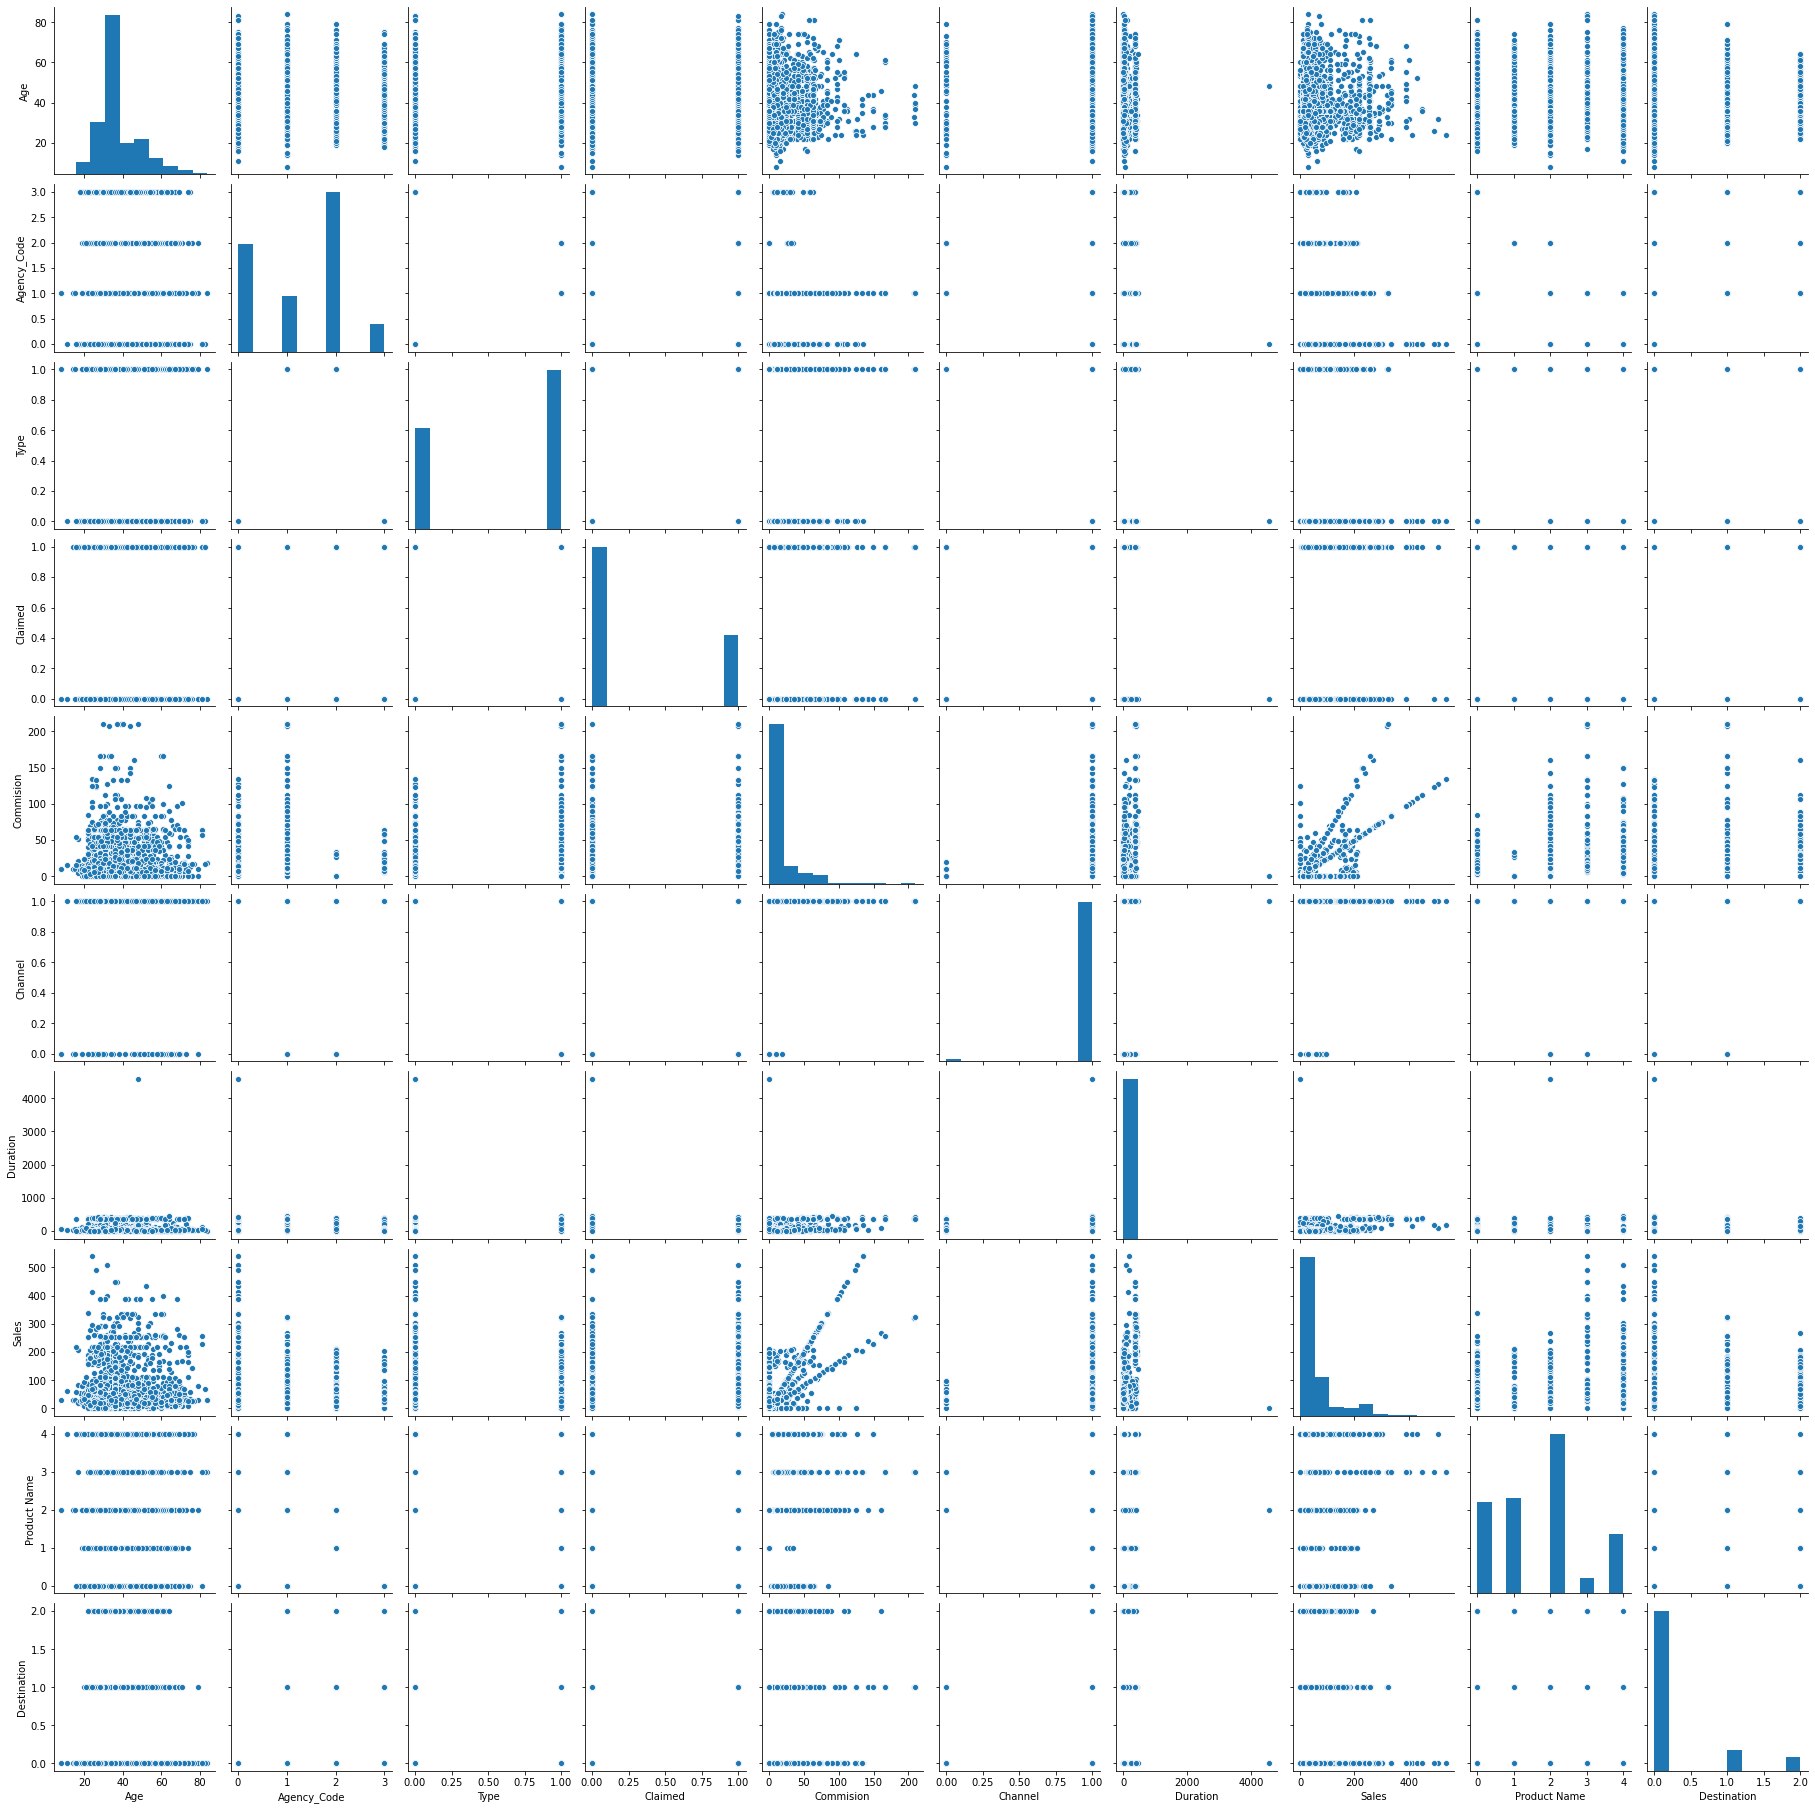

In [ ]:
sns.pairplot(data[['Age','Agency_Code', 'Type', 'Claimed', 'Commision','Channel','Duration','Sales','Product Name','Destination']])

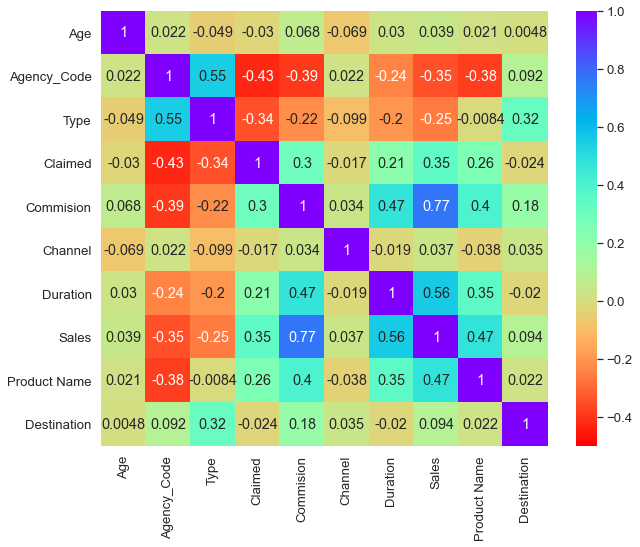

In [ ]:
# construct heatmap with only continuous variables

plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data[['Age','Agency_Code', 'Type', 'Claimed', 'Commision','Channel','Duration','Sales','Product Name','Destination']].corr(),cmap='rainbow_r', annot=True,vmin=-0.5,vmax=1)

In [ ]:
# capture the target column ("default") into separate vectors for training set and test set
X = data.drop(["Channel",'Claimed'] , axis=1)
y = data.pop("Claimed")

In [ ]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state = 123)

In [ ]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state=123)
rfcl = rfcl.fit(X_train, y_train, train_labels)

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
dtc=DecisionTreeClassifier(random_state=123)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
prediction_dtc=dtc.predict(X_train)

Accuracy for DecisionTreeClassifier model is 
 0.9928571428571429


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1444
           1       1.00      0.98      0.99       656

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



Confusion Matrix for DecisionTreeClassifier model is


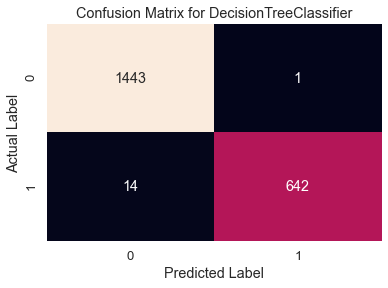

In [ ]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(y_train,prediction_dtc))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(y_train,prediction_dtc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_train,prediction_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
rfc=RandomForestClassifier(random_state=123)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [ ]:
prediction_rfc=rfc.predict(X_train)

Accuracy for RandomForestClassifier model is 
 0.9928571428571429


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1444
           1       0.99      0.99      0.99       656

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



Confusion Matrix for RandomForestClassifier model is


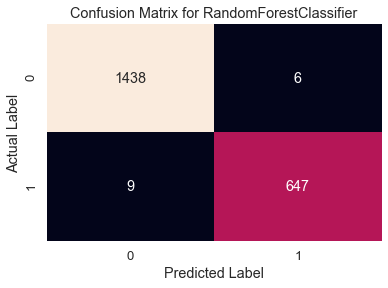

In [ ]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier'}

print('Accuracy for {} model is'.format(models_names[rfc]),'\n',accuracy_score(y_train,prediction_rfc))
print('\n')
print('Classification report for {} model is'.format(models_names[rfc]),'\n',classification_report(y_train,prediction_rfc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(y_train,prediction_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(500),solver='sgd',random_state=0,max_iter=500)

In [ ]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=0,
              solver='sgd')

In [ ]:
prediction_ann=mlp.predict(X_train)

Accuracy for ANN model is 
 0.7633333333333333


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1444
           1       0.68      0.46      0.55       656

    accuracy                           0.76      2100
   macro avg       0.73      0.68      0.70      2100
weighted avg       0.75      0.76      0.75      2100



Confusion Matrix for ANN model is


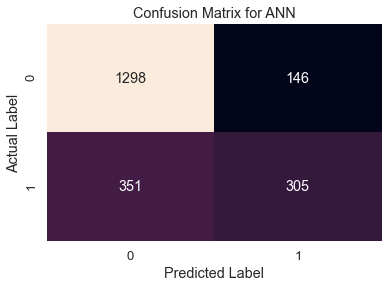

In [ ]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(y_train,prediction_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(y_train,prediction_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_train,prediction_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
models=[dtc,rfc,mlp]
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.7077777777777777


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       632
           1       0.51      0.49      0.50       268

    accuracy                           0.71       900
   macro avg       0.65      0.64      0.65       900
weighted avg       0.70      0.71      0.71       900



Confusion Matrix for DecisionTreeClassifier model is


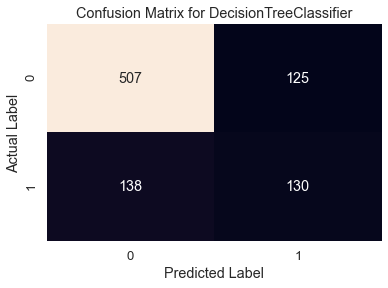

Accuracy for RandomForestClassifier model is 
 0.7877777777777778


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       632
           1       0.66      0.59      0.62       268

    accuracy                           0.79       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.78      0.79      0.78       900



Confusion Matrix for RandomForestClassifier model is


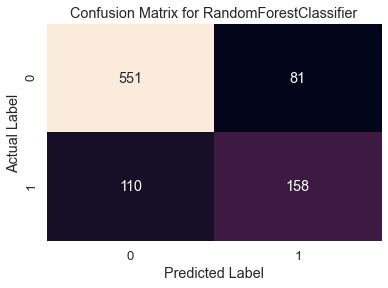

Accuracy for ANN model is 
 0.7744444444444445


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       632
           1       0.66      0.50      0.57       268

    accuracy                           0.77       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



Confusion Matrix for ANN model is


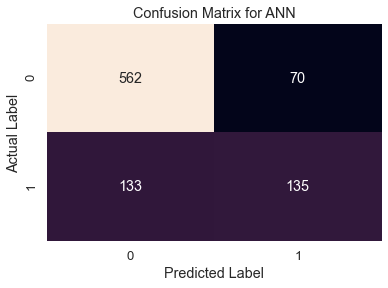

In [ ]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_test,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

Area under the curve for Decision Tree Classification Model is 0.6453924995276781
Area under the curve for Random Forest Classification Model is 0.8048041044776119
Area under the curve for Artificial Neural Network Model is 0.8202136075949367


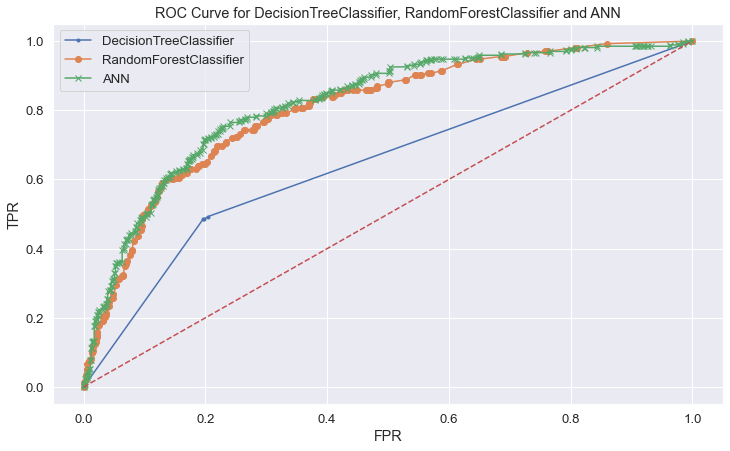

In [ ]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(y_test,mlp.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()